# GRIP Internship - The Sparks Foundation


### Author: Harshit Singh

#### Task 4 - Data Science and Business Analytics

## Exploratory Data Analysis - Terrorism

Problem Statement: 

As a security/defense analyst, try to find out the hot zone of terrorism.

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

What all security issues and insights you can derive by EDA?

In [68]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
import folium
from folium.plugins import MarkerCluster

In [73]:
df = pd.read_csv("/content/sample_data/globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [28]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3494,198305240006,1983,5,24,NaN,0,NaN,45,Colombia,3,South America,Santander,Vuelta de Acuna,6.655556,-74.268889,2.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Insurgency/Guerilla Action,0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,4.0,Military,29.0,Military Unit/Patrol/Convoy,NaN,Military Unit,...,NaN,NaN,Automatic firearm,4.0,NaN,NaN,0.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
3495,198305240007,1983,5,24,NaN,0,NaN,45,Colombia,3,South America,Valle del Cauca,Palmira,3.529901,-76.298006,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,9.0,Unknown,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,75.0,Village/City/Town/Suburb,NaN,Village of Palmira,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,Damages: ransacked unknown number of stores an...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
3496,198305240008,1983,5,24,NaN,0,NaN,145,Nicaragua,2,Central America & Caribbean,Chontales,Bartola,12.100000,-85.216667,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Insurgency/Guerilla Action,0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,4.0,Military,29.0,Military Unit/Patrol/Convoy,NaN,Military Unit,...,NaN,NaN,Automatic firearm,NaN,NaN,0.0,NaN,NaN,0.0,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
3497,198305240009,1983,5,24,NaN,0,NaN,145,Nicaragua,2,Central America & Caribbean,Nueva Segovia,Jalapa,13.924030,-86.084980,3.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Insurgency/Guerilla Action,0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,4.0,Military,29.0,Military Unit/Patrol/Convoy,NaN,Military Unit,...,NaN,NaN,Automatic firearm,6.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
3498,198305240010,1983,5,24,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Camlough,54.180640,-6.410521,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,3.0,Police,23.0,Police Patrol (including vehicles and convoys),NaN,Royal Ulster Constabulary Patrol Car,...,NaN,NaN,Explosive; Mine,NaN,NaN,NaN,2.0,NaN,NaN,1.0,3.0,Minor (likely < $1 m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Columns: 135 entries, eventid to related
dtypes: float64(71), int64(9), object(55)
memory usage: 3.6+ MB


In [30]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,success,suicide,attacktype1,attacktype2,attacktype3,attacktype3_txt,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.499000e+03,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3338.000000,3.338000e+03,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,799.000000,3498.000000,3498.000000,3498.000000,8.000000,1.0,0.0,3498.000000,3358.000000,3489.000000,62.000000,52.000000,62.000000,8.000000,6.000000,7.000000,0.0,0.0,3499.000000,4.00000,2.000000,3499.000000,1007.000000,563.000000,564.000000,79.000000,3.000000,2.000000,1.0,1.0,2.000000,3498.000000,3000.000000,231.000000,191.000000,34.000000,29.000000,9.000000,10.000000,2613.000000,669.000000,666.000000,2393.000000,663.000000,636.000000,3498.000000,1899.000000,7.530000e+02,3494.000000,315.000000,315.000000,91.000000,56.000000,3483.000000,5.400000e+01,0.0,9.000000,0.0,0.0,89.000000,68.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,1.978429e+11,1978.367534,5.998285,15.299228,0.016576,175.509574,4.199200,22.175030,-2.586921e+04,1.385363,0.038308,0.997713,0.995712,0.814180,-0.840194,1.198999,0.903373,0.000572,3.315323,4.625000,0.0,NaN,6.970269,41.666170,148.057323,9.435484,50.365385,200.290323,11.250000,66.500000,141.714286,NaN,NaN,0.052015,0.50000,0.500000,0.001429,-26.874876,-84.714032,0.086879,4.759494,0.666667,5.500000,1.0,1.0,0.500000,6.580617,11.638000,6.636364,9.324607,6.970588,9.620690,6.333333,14.200000,2.579028,0.104634,0.184685,1.638947,0.276018,0.014151,0.618353,3.462349,9.813068e+05,0.090155,-23.469841,-0.431746,0.464286,12.196429,0.016078,1.225704e+06,NaN,215222.222222,NaN,NaN,2.719101,14.985294,-3.466114,-3.410352,0.195882,-2.678868
std,5.722439e+08,5.722009,3.557258,9.062323,0.127695,139.863738,3.291887,23.652887,1.491739e+06,1.051781,0.191965,0.047775,0.065353,0.389017,3.022254,0.429722,0.295491,0.023908,1.928460,2.559994,NaN,NaN,6.168377,30.102391,73.414883,6.224281,26.821142,122.327481,6.430952,24.793144,74.520052,NaN,NaN,0.222089,0.57735,0.707107,0.037780,110.897971,35.137933,0.747694,3.853787,0.577350,6.363961,NaN,NaN,0.707107,2.313181,8.048429,2.196296,7.372736,2.822907,8.499638,1.322876,7.509993,9.757765,0.740888,1.160946,16.705871,1.740962,0.130852,1.244433,0.522446,2.034380e+07,0.286444,80.228187,8.020531,11.739036,33.497582,0.125794,6.831957e+06,NaN,315512.193813,NaN,NaN,1.270189,44.536918,4.453749,4.508514,0.623900,4.446683
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,8.000000,1.000000,-39.820083,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.0,NaN,1.000000,1.000000,8.000000,1.000000,1.000000,6.000000,2.000000,39.000000,15.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,2.000000,0.000000,5.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,NaN,12000.000000,NaN,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971051e+11,1971.000000,3.000000,7.000000,0.000000,69.000000,2.000000,11.742624,-8.840168e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.0,NaN,2.000000,21.

In [31]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,success,suicide,attacktype1,attacktype2,attacktype3,attacktype3_txt,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999981,0.013054,0.034083,-0.079211,-0.363291,0.199000,-0.387087,-0.011494,0.220457,0.130423,-0.020045,-0.029469,-0.202532,-0.072036,-0.559086,0.109434,0.017331,-0.207070,0.406224,NaN,NaN,0.153538,0.163125,-0.531334,0.130626,0.166862,-0.128813,0.017743,0.411805,-0.130595,NaN,NaN,-0.059521,-0.576399,1.0,-0.019529,0.492788,0.098234,-0.209959,0.207399,0.999998,-1.0,NaN,NaN,1.0,-0.056570,-0.385091,-0.054871,-0.042482,-0.165232,-0.087493,0.480847,-0.079297,0.196187,0.098614,0.317587,0.053635,-0.058683,0.259858,0.187124,0.411485,0.032323,0.050672,-0.200395,0.024310,-0.063334,-0.259739,-0.092257,0.253283,NaN,0.662583,NaN,NaN,0.286827,-0.137336,0.199237,0.187650,-0.085146,0.158284
iyear,0.999981,1.000000,0.006829,0.033553,-0.079157,-0.363288,0.199211,-0.386708,-0.011313,0.220625,0.130825,-0.019923,-0.029411,-0.202972,-0.071709,-0.558785,0.109233,0.017269,-0.206868,0.406979,NaN,NaN,0.153344,0.162965,-0.531127,0.131079,0.167111,-0.129386,0.018127,0.409257,-0.133380,NaN,NaN,-0.059365,-0.577350,NaN,-0.019622,0.492691,0.098509,-0.209061,0.205973,1.000000,NaN,NaN,NaN,NaN,-0.056631,-0.385197,-0.054130,-0.041067,-0.164695,-0.085829,0.478091,-0.080222,0.196418,0.098622,0.317500,0.053510,-0.058965,0.259310,0.186991,0.411551,0.032283,0.050475,-0.200027,0.024448,-0.063815,-0.259638,-0.092197,0.254531,NaN,0.665409,NaN,NaN,0.287305,-0.137344,0.199146,0.187516,-0.085259,0.158102
imonth,0.013054,0.006829,1.000000,0.059689,-0.008748,-0.005147,-0.031927,-0.066057,-0.029065,-0.024980,-0.063182,-0.020202,-0.009856,0.068074,-0.052783,0.018002,0.033654,0.010092,-0.035016,-0.297280,NaN,NaN,0.033230,0.028134,-0.039096,-0.042648,0.015619,0.071730,-0.075113,0.253401,0.575821,NaN,NaN,-0.026665,-0.382360,1.0,0.014908,0.083552,-0.009423,-0.101808,0.270268,0.928571,-1.0,NaN,NaN,1.0,0.011459,0.010854,-0.100093,-0.182335,-0.034064,-0.144409,-0.397033,0.093598,-0.034906,0.015989,0.064142,0.024639,0.029043,0.108655,0.023245,0.037944,0.008006,0.032607,-0.060455,-0.018203,0.063072,-0.063510,-0.010727,-0.144611,NaN,-0.469959,NaN,NaN,-0.006652,-0.023674,0.016681,0.023577,0.017060,0.031471
iday,0.034083,0.033553,0.059689,1.000000,-0.038873,-0.008911,-0.011419,-0.019207,-0.016503,0.006405,-0.003140,0.017431,0.011340,0.033216,-0.013804,-0.062159,0.011870,-0.002110,-0.025754,0.208764,NaN,NaN,0.013228,0.009792,-0.029749,-0.147391,-0.132357,-0.050767,0.421547,0.064409,-0.810597,NaN,NaN,0.020815,-0.314270,-1.0,-0.012104,0.017757,-0.048094,0.017321,0.089858,0.802955,1.0,NaN,NaN,-1.0,-0.032610,0.028946,0.079525,0.110156,0.172199,-0.151672,-0.374145,-0.258685,0.012123,-0.001795,0.029792,-0.051469,-0.005645,0.014179,0.008888,0.029594,0.043860,-0.020855,-0.061782,-0.026845,-0.207522,0.061828,-0.000924,-0.086710,NaN,-0.063638,NaN,NaN,0.040871,-0.116750,0.006560,0.004109,0.018143,0.014348
extended,-0.079211,-0.079157,-0.008748,-0.038873,1.000000,-0.040122,0.029547,-0.057300,0.002242,-0.005005,-0.014252,0.006217,0.008521,0.033254,-0.000199,-0.036771,0.042467,-0.003106,0.145960,NaN,NaN,NaN,-0.017161,0.002593,0.065313,0.219092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030411,NaN,NaN,-0.004911,0.097035,0.147480,0.032990,0.125386,NaN,NaN,NaN,NaN,NaN,0.225849,-0.049070,0.025589,-0.083868,0.047590,0.354359,0.755929,0.318146,0

In [33]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### US Terror Attacks and Death Injuries.

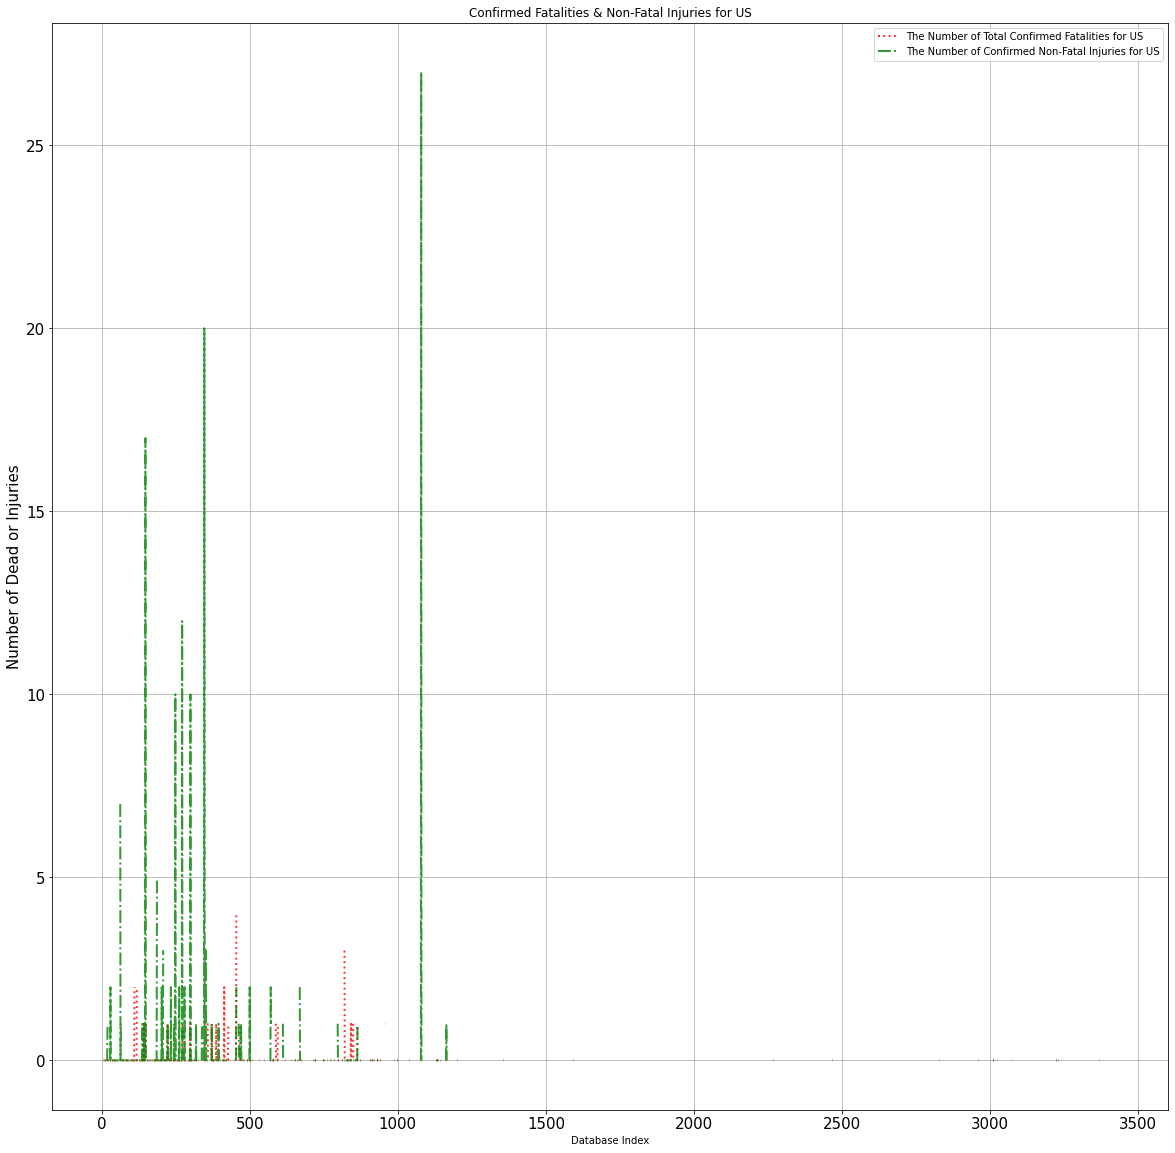

In [37]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

### Death and Injuries at all time

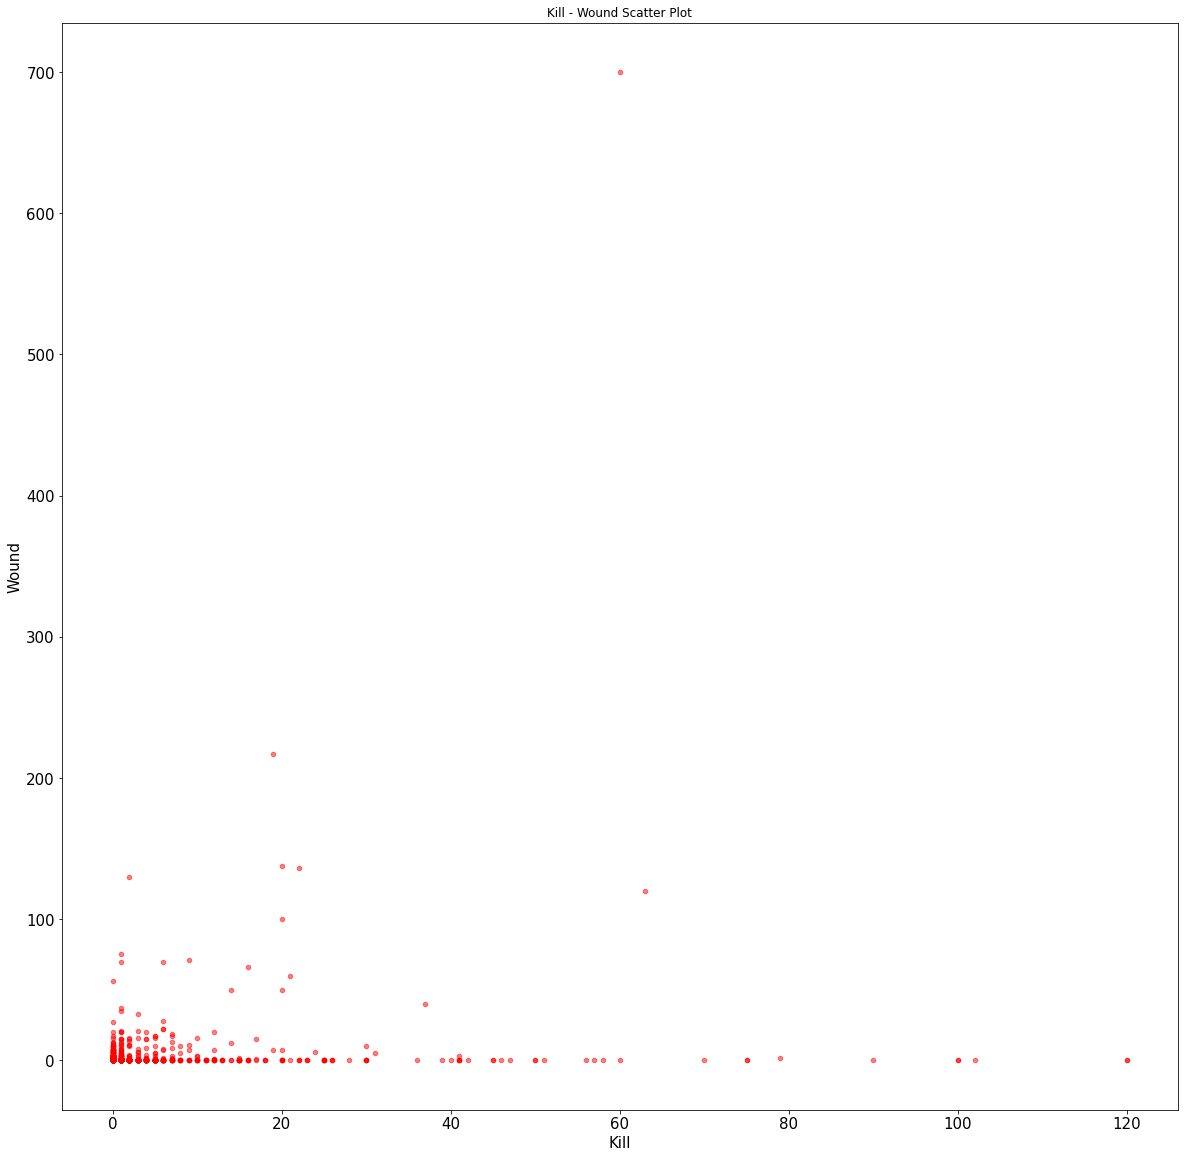

In [38]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

### Frequency of Terrorist Actions in Customized Region

##### Let's analyze in Middle East and North Africa

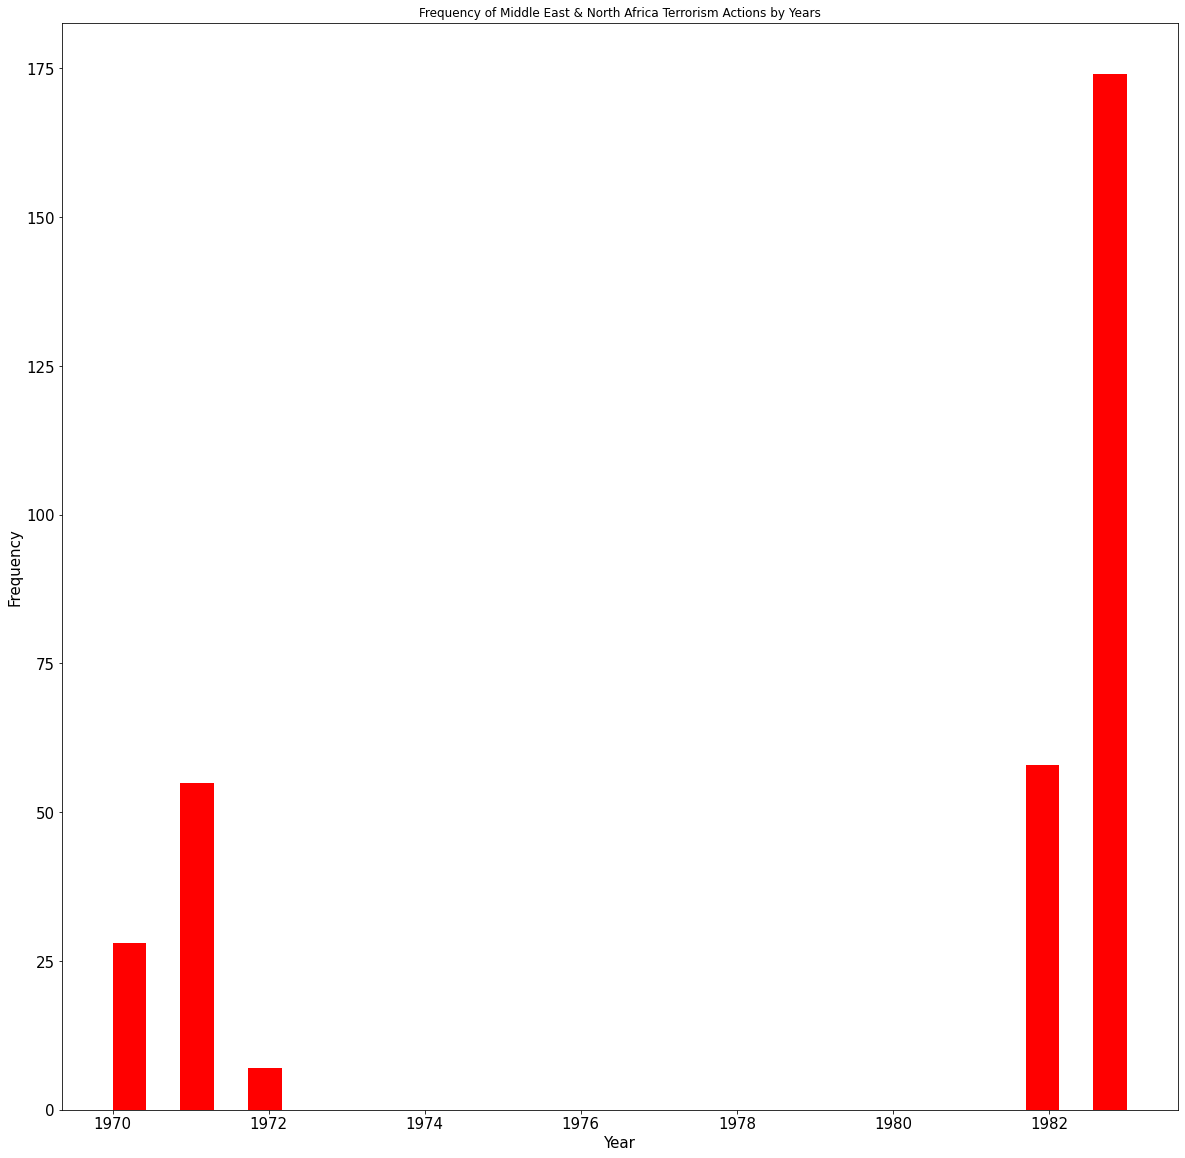

In [39]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

Terrorist attacks have increased in recent years.

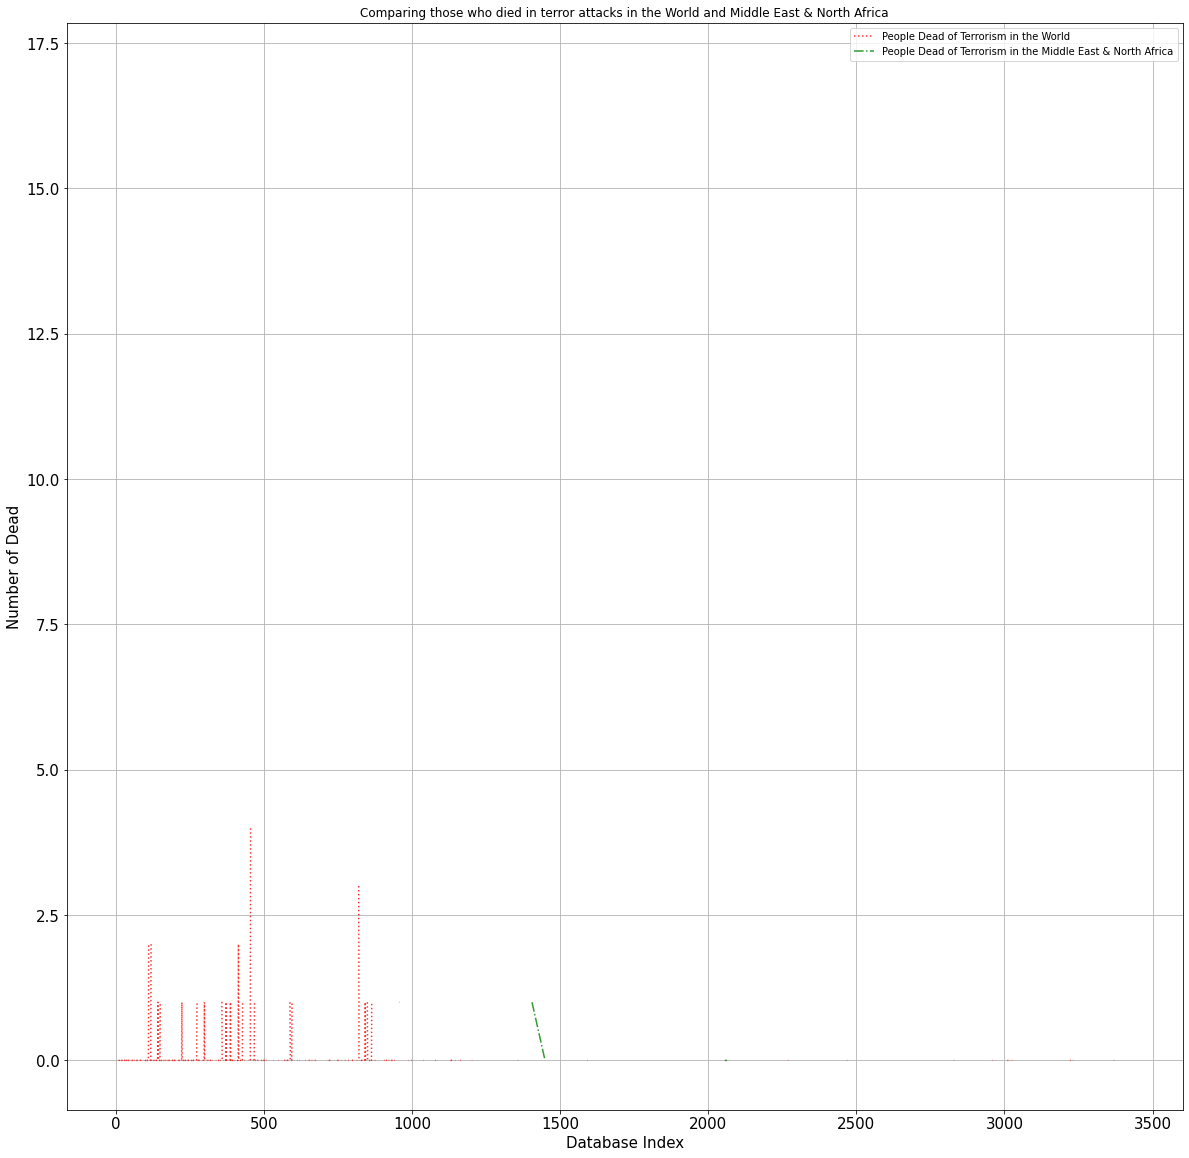

In [40]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

### Terrorist Attacks of a Particular year and their Locations.

##### Let's look at the terrorist acts in the world over a certain year.

In [41]:
filterYear = df['iyear'] == 1970

In [42]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList


In [43]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

### 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

##### Total Number of people killed in terror attack

In [44]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 6739


Number of people killed by terror attack: 6739

#### Let's look at what types of attacks these deaths were made of.

In [45]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [46]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,4615.0,495.0,1274.0,17.0,3.0,8.0,40.0,2.0,284.0


In [47]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


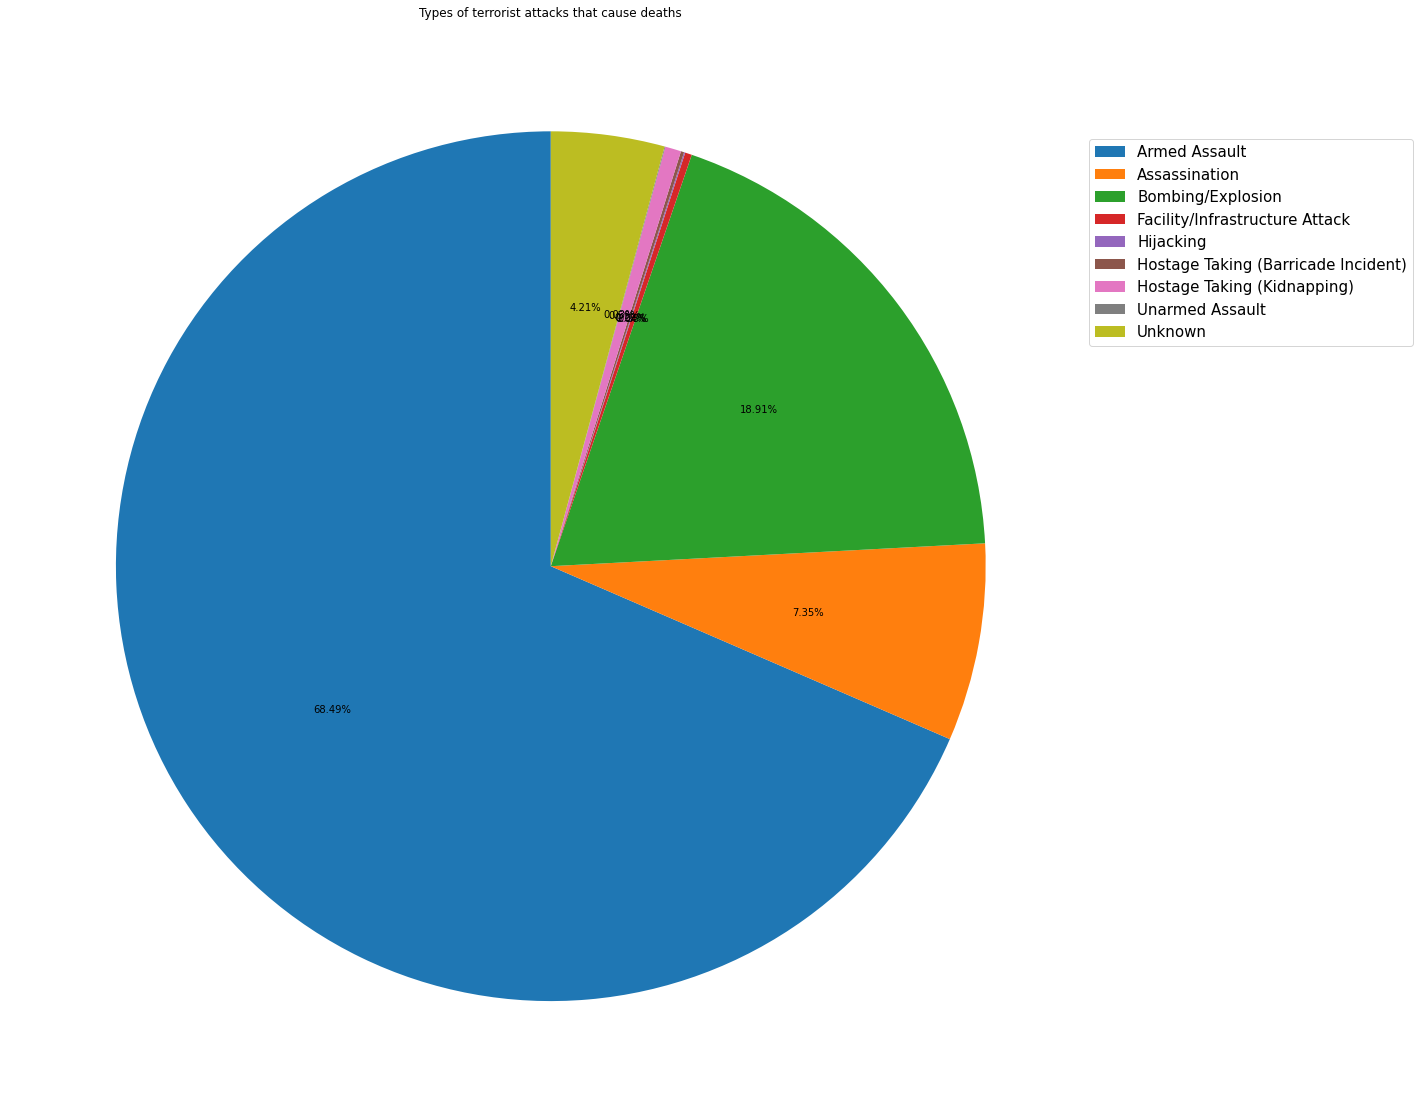

In [52]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

##### Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

###### Number of Killed in Terrorist Attacks by Countries

In [53]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [54]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Angola,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Cambodia,Canada,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Greece,Grenada,Guatemala,Haiti,Honduras,Iceland,India,Iran,Iraq,Ireland,Israel,Italy,Japan,Jordan,Kuwait,Lebanon,Lesotho,Luxembourg,Malaysia,Mexico,Mozambique,Myanmar,Namibia,Netherlands,Nicaragua,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Somalia,South Africa,South Yemen,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Taiwan,Thailand,Turkey,Uganda,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zambia,Zimbabwe
nkill,112.0,10.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,7.0,351.0,1.0,0.0,26.0,1.0,0.0,1.0,1.0,1715.0,1.0,12.0,3.0,0.0,517.0,5.0,9.0,0.0,29.0,88.0,97.0,2.0,13.0,3.0,0.0,1.0,0.0,279.0,21.0,0.0,0.0,0.0,23.0,0.0,4.0,1.0,1432.0,7.0,0.0,1.0,1112.0,133.0,0.0,1.0,0.0,35.0,0.0,35.0,5.0,0.0,0.0,0.0,2.0,47.0,25.0,1.0,10.0,121.0,284.0,63.0,4.0,26.0,9.0,10.0,2.0,1.0,32.0


In [56]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Angola                    1 non-null      float64
 1   Argentina                 1 non-null      float64
 2   Australia                 1 non-null      float64
 3   Austria                   1 non-null      float64
 4   Belgium                   1 non-null      float64
 5   Bolivia                   1 non-null      float64
 6   Brazil                    1 non-null      float64
 7   Bulgaria                  1 non-null      float64
 8   Cambodia                  1 non-null      float64
 9   Canada                    1 non-null      float64
 10  Chile                     1 non-null      float64
 11  Colombia                  1 non-null      float64
 12  Costa Rica                1 non-null      float64
 13  Cyprus                    1 non-null      float64
 14  Czechoslova

In [57]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

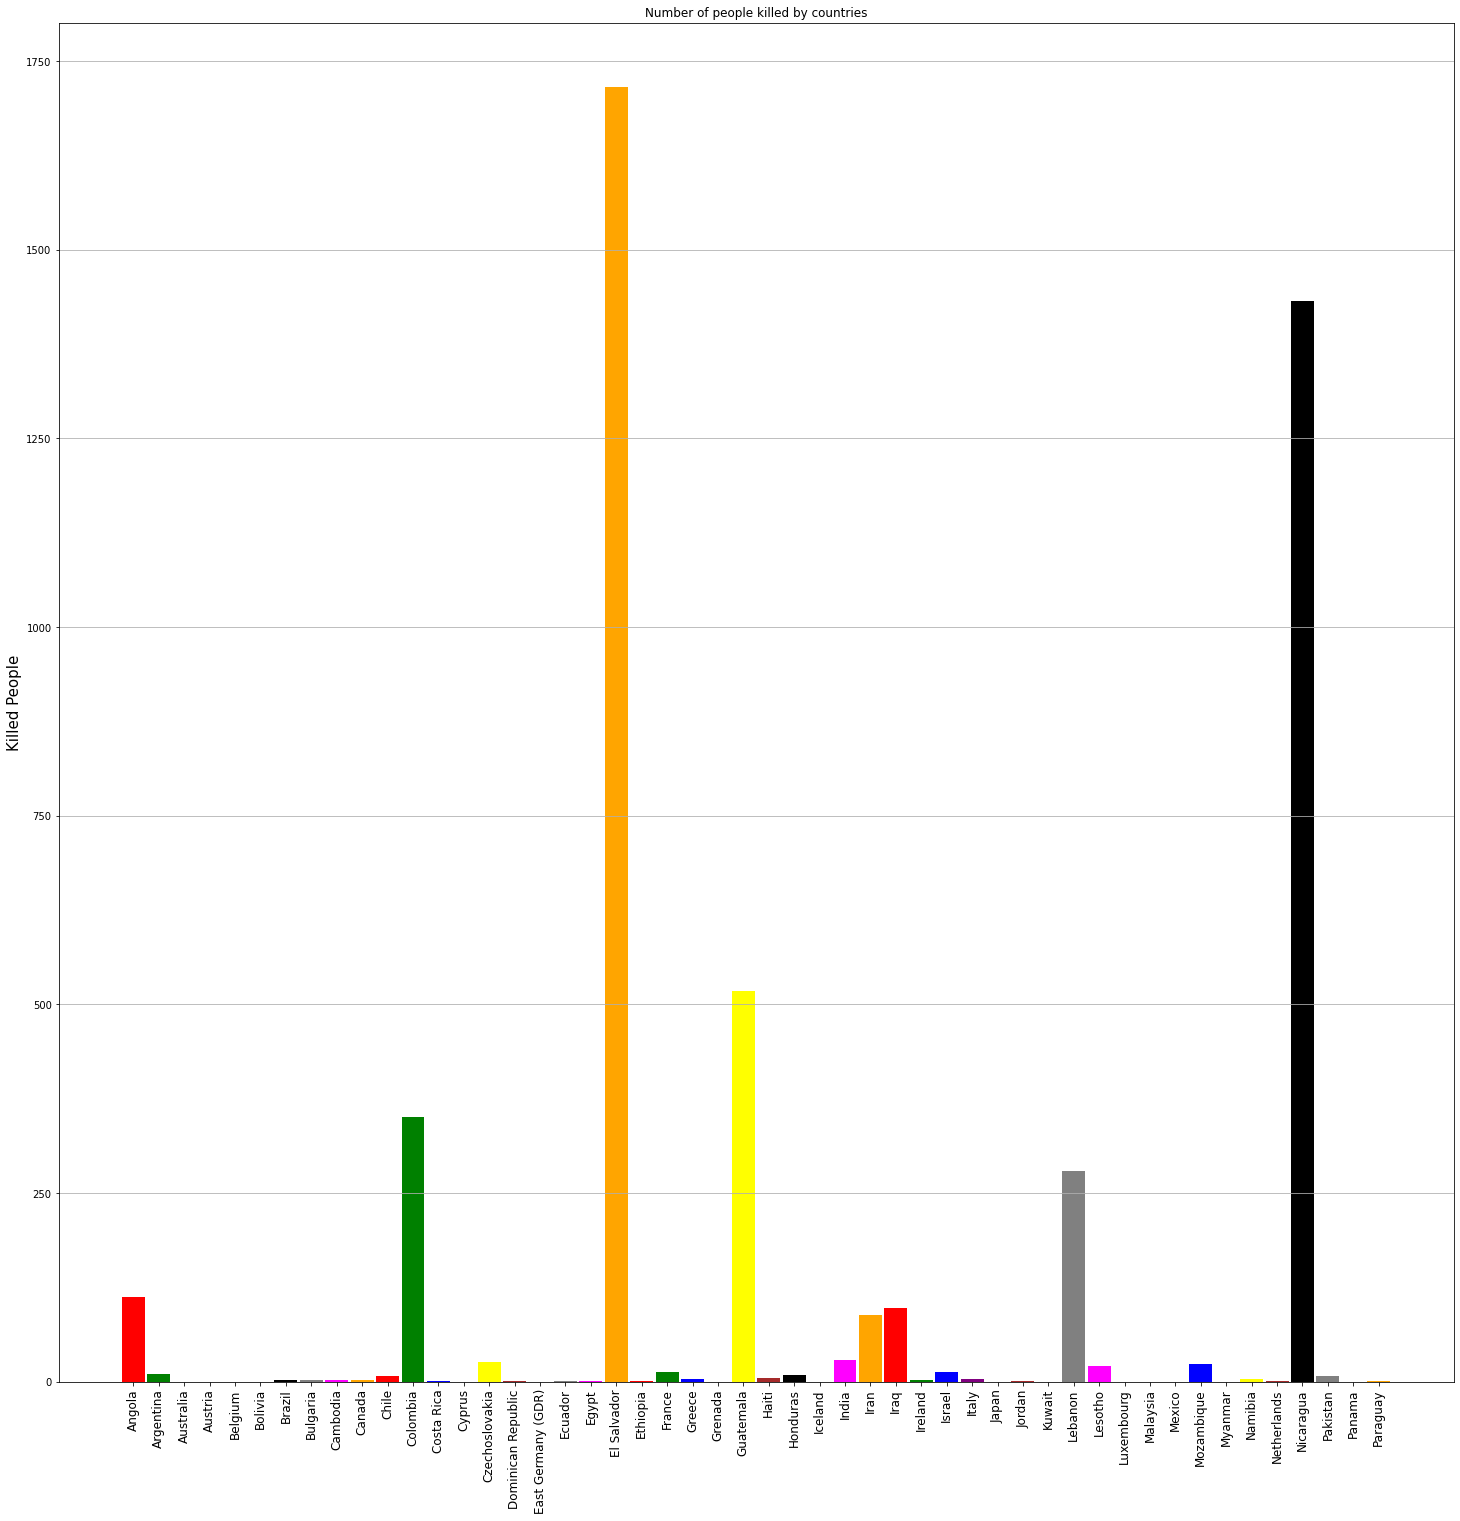

In [58]:

labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

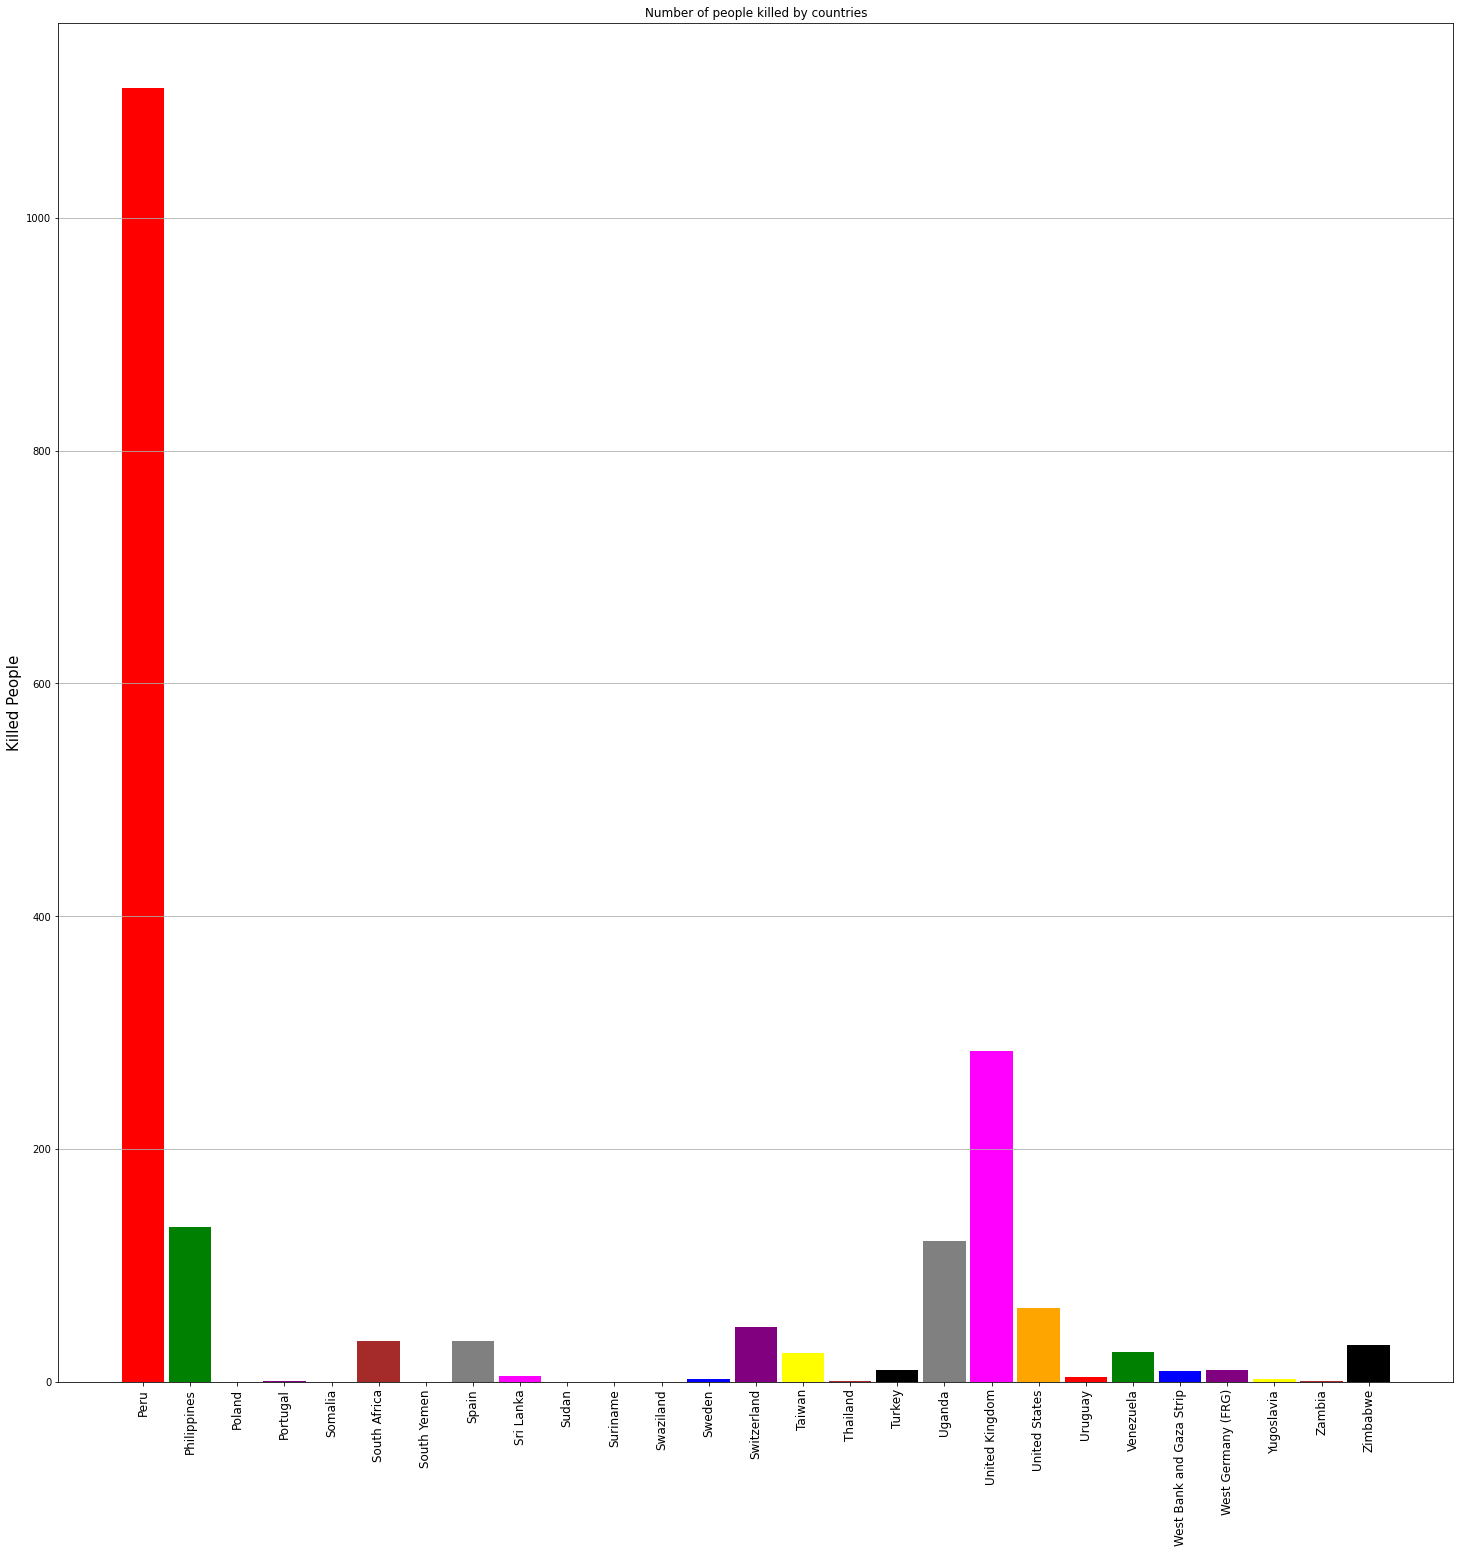

In [59]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()